<a href="https://colab.research.google.com/github/PhilBoonyawat/predictskincancer/blob/main/Copy_of_Proj2_Skin_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project 2: Skin Cancer Prediction**

Pipeline
1. get data
2. extract feature
3. train model
4. test model
5. deploy model

## **Get Data from Kaggle**


Steps
1. ไปที่ บัญชี www.kaggle.com ของตัวเอง > Account > เลื่อนไปที่ API แล้วคลิก Creat New API Token แล้ว save file "kaggle.json" ไว้ที่เครื่อง

2. ไปที่ Google drive สร้าง folder ชื่อ Kaggle แล้ว upload kaggle.json มาไว้ที่นี่

3. ไปที่ Colab code ให้ mount google drive 

4. ไปที่ folder Kaggle 

5. ไปที่ชุดข้อมูลใน kaggle และคัดลอกคำสั่ง API สำหรับดาวน์โหลดชุดข้อมูลมา โดยคลิกที่จุด 3 จุด (อยู่ข้างๆปุ่ม New Notebook) แล้วคลิก Copy API command

6. ใน Colab พิมพ์ ! แล้วกด Ctrl+v เพื่อ paste API command ที่ copy มา

7. สร้่าง directory ไว้เก็บ dataset แล้วใช้คำสั่ง unzip และ ใช้คำสั่ง rm ลบ zip file 

8. copy รูปมาไว้ใน google drive



In [ ]:
!pip install -q kaggle

In [ ]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
# ใส่ path Google Drive ที่มี kaggle.json อยู่ 
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Kaggle"

#changing the working directory
%cd /content/drive/MyDrive/Kaggle

/content/drive/MyDrive/Kaggle


In [ ]:
# if you want to check the present working directory using pwd command
!pwd

/content/drive/MyDrive/Kaggle


In [ ]:
# download data set จาก Kaggle.com มา
!kaggle datasets download -d ayaanmustafa/augmented-skincancer-isic

 99% 580M/589M [00:07<00:00, 70.3MB/s]
100% 589M/589M [00:07<00:00, 79.1MB/s]


In [ ]:
# ดูว่ามีไฟล์อะไรบ้างใน folder Kaggle 
!ls

augmented-skincancer-isic.zip  kaggle.json


In [ ]:
# สร้่าง directory ไว้เก็บ dataset
!mkdir '/content/skindataset'

In [ ]:
# unzipping the zip files and 
# !unzip \*.zip  

!unzip '/content/drive/MyDrive/Kaggle/augmented-skincancer-isic.zip' -d '/content/skindataset'

เอาต์พุตของการสตรีมมีการตัดเหลือเพียง 5000 บรรทัดสุดท้าย
  inflating: /content/skindataset/skin_cancer/train/nevus/nevus_original_ISIC_0000019.jpg_9e0d8376-9e8d-4327-a03b-89153c6a4b0c.jpg  
  inflating: /content/skindataset/skin_cancer/train/nevus/nevus_original_ISIC_0000019.jpg_e0fb4d2e-ef16-4ee1-bd84-97a1cf2f4ba8.jpg  
  inflating: /content/skindataset/skin_cancer/train/nevus/nevus_original_ISIC_0000019.jpg_f617a122-dc8c-49b9-8395-27dfead1c54d.jpg  
  inflating: /content/skindataset/skin_cancer/train/nevus/nevus_original_ISIC_0000020.jpg_58d342e8-e7fb-4c05-a0cc-980ea4409bb6.jpg  
  inflating: /content/skindataset/skin_cancer/train/nevus/nevus_original_ISIC_0000020.jpg_fcd7ba6c-ef3a-43be-adf5-4a81f76c0dff.jpg  
  inflating: /content/skindataset/skin_cancer/train/nevus/nevus_original_ISIC_0000021.jpg_7f0b347d-ecae-449c-8ed1-60f6fe44f66c.jpg  
  inflating: /content/skindataset/skin_cancer/train/nevus/nevus_original_ISIC_0000023.jpg_2b54842a-3aa2-4d7d-a0cc-3e67fbbd1717.jpg  
  inflating:

In [ ]:
# deleting the zip files
# !rm *.zip

!rm '/content/drive/MyDrive/Kaggle/augmented-skincancer-isic.zip'

In [ ]:
# copy รูปไปใน drive
%cp -r '/content/skindataset/skin_cancer' '/content/drive/MyDrive/Colab Notebooks/DSE3/Proj_2/Data'

## **Extract Features**

In [ ]:
!pip install botnoi==0.2.1

In [ ]:
import botnoi as bn
from botnoi import scrape as sc
from botnoi import cv
import os

In [ ]:
img = bn.cv.image('/content/drive/MyDrive/Colab Notebooks/DSE3/Proj_2/Data/skin_cancer/train/normal/normal_train01.jpg')

In [ ]:
img

In [ ]:
img.getmobilenet()

17227776/17225924 [==============================] - 0s 0us/step


array([3.21556458e-07, 1.51855865e-05, 1.55138977e-06, 5.34304012e-06,
       2.91836284e-07, 2.51576577e-06, 1.65030899e-06, 2.66727520e-06,
       1.04158704e-07, 8.09785965e-06, 5.74147266e-07, 5.65669522e-06,
       9.47713467e-07, 1.52670643e-07, 1.06406499e-07, 6.86015217e-07,
       2.98121717e-07, 1.76212003e-07, 3.68171245e-07, 1.74290829e-07,
       4.02611369e-08, 1.49195048e-07, 4.54606029e-09, 6.81222717e-07,
       5.48521968e-08, 1.39301881e-07, 1.15032994e-07, 8.52560411e-07,
       3.76649188e-07, 4.92786433e-07, 2.68214406e-08, 8.40662103e-07,
       1.99403169e-09, 1.91495511e-09, 7.52531101e-09, 5.70599728e-09,
       1.30615634e-07, 4.75916231e-07, 3.05969599e-07, 8.02444545e-09,
       6.02605635e-07, 8.79881928e-09, 6.29039482e-08, 2.34333735e-08,
       4.05192916e-08, 1.29557278e-07, 1.88618113e-06, 1.55065523e-07,
       8.26650600e-07, 1.71334254e-09, 5.96579836e-09, 2.15128604e-08,
       8.31613214e-07, 3.86970327e-07, 1.75305200e-07, 3.22369172e-07,
      

In [ ]:
import glob

def extractimagefeat(createFolder, skintype, sourceDirectory):
  #create folder
  foldername = createFolder+'/'+skintype
  isdir = os.path.isdir(foldername) 
  #check if folder exist
  if not isdir:
    #create directory
    os.makedirs(foldername)

  # สร้่าง list ที่มี directory ของ แต่ละรูป
  imgList = []
  for imgpath in glob.glob(sourceDirectory+'/'+skintype+"/*"):
    imgList.append(imgpath)

  # extract features จากรูป รูปที่ 1 - 150
  i = 1
  for path in imgList[0:160]:
    try:
      print(i)
      savepath = foldername + '/'+skintype+str(i)+'.p'
      a = cv.image(path)
      a.getresnet50()
      a.save(savepath)
      i = i + 1
    except:
      print(i+1)
      i = i + 1
  return 'complete'


In [ ]:
print(glob.glob('/content/drive/MyDrive/Colab Notebooks/DSE3/Proj_2/Data/skin_cancer/train/*'))

['/content/drive/MyDrive/Colab Notebooks/DSE3/Proj_2/Data/skin_cancer/train/actinic keratosis', '/content/drive/MyDrive/Colab Notebooks/DSE3/Proj_2/Data/skin_cancer/train/basal cell carcinoma', '/content/drive/MyDrive/Colab Notebooks/DSE3/Proj_2/Data/skin_cancer/train/dermatofibroma', '/content/drive/MyDrive/Colab Notebooks/DSE3/Proj_2/Data/skin_cancer/train/melanoma', '/content/drive/MyDrive/Colab Notebooks/DSE3/Proj_2/Data/skin_cancer/train/nevus', '/content/drive/MyDrive/Colab Notebooks/DSE3/Proj_2/Data/skin_cancer/train/pigmented benign keratosis', '/content/drive/MyDrive/Colab Notebooks/DSE3/Proj_2/Data/skin_cancer/train/seborrheic keratosis', '/content/drive/MyDrive/Colab Notebooks/DSE3/Proj_2/Data/skin_cancer/train/squamous cell carcinoma', '/content/drive/MyDrive/Colab Notebooks/DSE3/Proj_2/Data/skin_cancer/train/vascular lesion', '/content/drive/MyDrive/Colab Notebooks/DSE3/Proj_2/Data/skin_cancer/train/normal']


**extract train data**

In [ ]:
create_folder = '/content/drive/MyDrive/Colab Notebooks/DSE3/Proj_2/Data/skin_cancer/Feature_train'
skinclass = ['actinic keratosis','basal cell carcinoma','dermatofibroma','melanoma','nevus','pigmented benign keratosis','seborrheic keratosis','squamous cell carcinoma','vascular lesion','normal']
source_directory = "/content/drive/MyDrive/Colab Notebooks/DSE3/Proj_2/Data/skin_cancer/train"

for skintype in skinclass:
  extractimagefeat(create_folder,skintype,source_directory)
  

1
94773248/94765736 [==============================] - 1s 0us/step
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128

**extract test data**

In [ ]:
create_folder = '/content/drive/MyDrive/Colab Notebooks/DSE3/Proj_2/Data/skin_cancer/Feature_test'
skinclass = ['actinic keratosis','basal cell carcinoma','dermatofibroma','melanoma','nevus','pigmented benign keratosis','seborrheic keratosis','squamous cell carcinoma','vascular lesion','normal']
source_directory = '/content/drive/MyDrive/Colab Notebooks/DSE3/Proj_2/Data/skin_cancer/Test'

for skintype in skinclass:
  extractimagefeat(create_folder,skintype,source_directory)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
1
2
3
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
1
2
3


##**Train Model**

###Create Dataset (สร้าง dataframe)

In [ ]:
import glob
import pickle
import pandas as pd

def createdataset(directory):
  imgfolder = glob.glob(directory+'/*')
  trainset = []
  for cls in imgfolder:
    clsset = pd.DataFrame()
    pList = glob.glob(cls+'/*')
    featvec = []
    for p in pList:
      dat = pickle.load(open(p,'rb'))
      featvec.append(dat.resnet50)

    clsset['feature'] = featvec
    cls = cls.split('/')[-1]
    clsset['label'] = cls
    trainset.append(clsset)
  return pd.concat(trainset,axis=0)



**สร้าง trainset dataframe**

In [ ]:
directory = '/content/drive/MyDrive/Colab Notebooks/DSE3/Proj_2/Data/skin_cancer/Feature_train'

trainset = createdataset(directory)

In [ ]:
trainset

,feature,label
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",actinic keratosis
1,"[0.0018756276965242757, 0.0013215009046278075,...",actinic keratosis
2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",actinic keratosis
3,"[0.0, 0.0, 0.0005876034446640624, 0.0, 0.0, 0....",actinic keratosis
4,"[0.0, 0.0, 0.0015272337373071663, 0.0, 0.0, 0....",actinic keratosis
...,...,...
155,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",normal
156,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0006047407787...",normal
157,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",normal
158,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0058190818322...",normal


**สร้าง testset dataframe**

In [ ]:
directory = '/content/drive/MyDrive/Colab Notebooks/DSE3/Proj_2/Data/skin_cancer/Feature_test'

testset = createdataset(directory)

In [ ]:
testset

,feature,label
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",actinic keratosis
1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",actinic keratosis
2,"[0.0001723288592674066, 0.0, 0.0, 0.0, 0.00418...",actinic keratosis
3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.001013526722369097...",actinic keratosis
4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",actinic keratosis
...,...,...
14,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",squamous cell carcinoma
15,"[0.0, 0.0, 0.0, 0.0, 0.0030053370237208086, 0....",squamous cell carcinoma
0,"[0.00027955288628348304, 0.0, 0.0, 0.0, 0.0, 0...",vascular lesion
1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",vascular lesion


**สร้าง support vector machine model จาก trainset dataframe**

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.svm import LinearSVC

def trainmodel(dataset,modfile=''):
  trainfeat, testfeat, trainlabel, testlabel = train_test_split(trainset['feature'], trainset['label'], test_size=0.20, random_state=0)
  clf = LinearSVC()
  mod = clf.fit(np.vstack(trainfeat.values),trainlabel.values)
  res = mod.predict(np.vstack(testfeat.values))

  if modfile!='':
    pickle.dump(mod,open(modfile,'wb'))
    
  acc = sum(res == testlabel)/len(res)
  return mod,acc,res, testlabel

In [ ]:
import datetime

start_time = datetime.datetime.now().replace(microsecond=0)
mod,acc,res, testlabel = trainmodel(trainset,'/content/drive/MyDrive/Colab Notebooks/DSE3/Proj_2/skinmod.mod')
end_time = datetime.datetime.now().replace(microsecond=0)
print(end_time - start_time)

0:00:15


In [ ]:
# accuracy
acc

0.80625

In [ ]:
# residual or error
res

array(['seborrheic keratosis', 'dermatofibroma', 'normal',
       'pigmented benign keratosis', 'seborrheic keratosis',
       'dermatofibroma', 'seborrheic keratosis', 'nevus',
       'vascular lesion', 'squamous cell carcinoma',
       'squamous cell carcinoma', 'nevus', 'normal', 'actinic keratosis',
       'basal cell carcinoma', 'squamous cell carcinoma',
       'seborrheic keratosis', 'basal cell carcinoma', 'vascular lesion',
       'actinic keratosis', 'pigmented benign keratosis',
       'actinic keratosis', 'dermatofibroma', 'actinic keratosis',
       'seborrheic keratosis', 'nevus', 'seborrheic keratosis',
       'actinic keratosis', 'normal', 'vascular lesion',
       'vascular lesion', 'dermatofibroma', 'seborrheic keratosis',
       'seborrheic keratosis', 'actinic keratosis',
       'basal cell carcinoma', 'normal', 'vascular lesion',
       'dermatofibroma', 'actinic keratosis', 'normal',
       'squamous cell carcinoma', 'dermatofibroma', 'vascular lesion',
       'sq

## **Test Model**

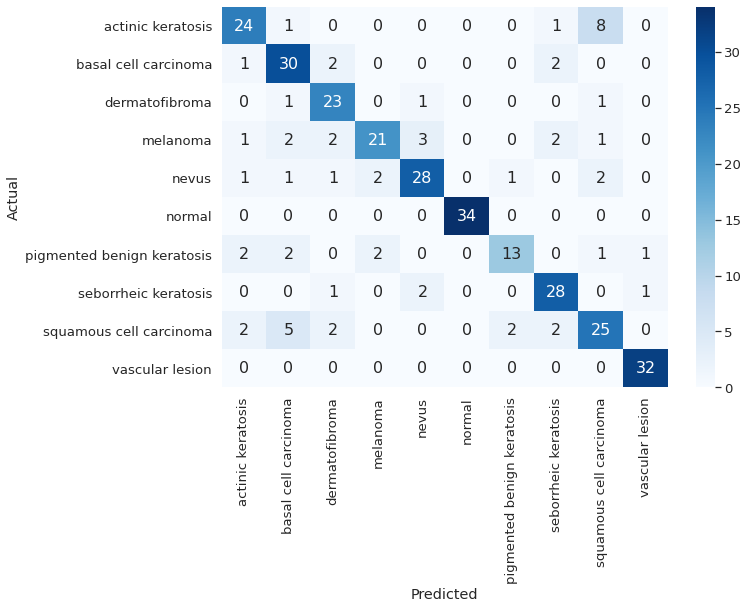

In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

y_true = testlabel
y_pred = res
data = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.2) #for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16}); # font size

## **Deploy Model**

In [ ]:
# load model
modFile = '/content/drive/MyDrive/Colab Notebooks/DSE3/Proj_2/skinmod.mod'
model = pickle.load(open(modFile,'rb'))

def predictimg(imgskin):
  a = cv.image(imgskin)
  feat = a.getresnet50()
  res = model.predict([feat])
  return res

In [ ]:
predictimg('/content/drive/MyDrive/Colab Notebooks/DSE3/Proj_2/Data/skin_cancer/Test/normal/normal_test01.jpg')

array(['normal'], dtype=object)

In [ ]:
predictimg('/content/drive/MyDrive/Colab Notebooks/DSE3/Proj_2/Data/skin_cancer/Test/actinic keratosis/ISIC_0024707.jpg')

array(['actinic keratosis'], dtype=object)

In [ ]:
predictimg('/content/drive/MyDrive/Colab Notebooks/DSE3/Proj_2/Data/skin_cancer/Test/basal cell carcinoma/ISIC_0024331.jpg')

array(['basal cell carcinoma'], dtype=object)

In [ ]:
predictimg('/content/drive/MyDrive/Colab Notebooks/DSE3/Proj_2/Data/skin_cancer/Test/dermatofibroma/ISIC_0024553.jpg')

array(['dermatofibroma'], dtype=object)

In [ ]:
predictimg('/content/drive/MyDrive/Colab Notebooks/DSE3/Proj_2/Data/skin_cancer/Test/pigmented benign keratosis/ISIC_0024381.jpg')

array(['pigmented benign keratosis'], dtype=object)

In [ ]:
predictimg('/content/drive/MyDrive/Colab Notebooks/DSE3/Proj_2/Data/skin_cancer/Test/pigmented benign keratosis/ISIC_0024381.jpg')

array(['pigmented benign keratosis'], dtype=object)

In [ ]:
predictimg('/content/drive/MyDrive/Colab Notebooks/DSE3/Proj_2/Data/skin_cancer/Test/seborrheic keratosis/ISIC_0010809.jpg')

array(['squamous cell carcinoma'], dtype=object)

In [ ]:
predictimg('/content/drive/MyDrive/Colab Notebooks/DSE3/Proj_2/Data/skin_cancer/Test/squamous cell carcinoma/ISIC_0024579.jpg')

array(['squamous cell carcinoma'], dtype=object)

In [ ]:
predictimg('/content/drive/MyDrive/Colab Notebooks/DSE3/Proj_2/Data/skin_cancer/Test/vascular lesion/ISIC_0024370.jpg')

array(['vascular lesion'], dtype=object)